<a href="https://colab.research.google.com/github/cgasdic/TELECOMX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [124]:
import pandas  as pd

In [125]:
datos = pd.read_json('/content/TelecomX_Data.json')

In [126]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [127]:
display(datos.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [128]:
# Extracción de los datos a nuevos dataframe
customer_data = pd.json_normalize(datos['customer'])
phone_data = pd.json_normalize(datos['phone'])
internet_data = pd.json_normalize(datos['internet'])
account_data = pd.json_normalize(datos['account'])

In [129]:
# Concatenar las columnas sin diccionarios con las de los nuevos dataframe normalizados
datos = pd.concat([datos[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)


In [130]:
display(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

In [131]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [132]:
#Transformar columnas a minisculas
columnas = list(datos.columns)
columnas
datos.rename(columns=lambda x: x.lower(), inplace=True)
#traducir nombres de las columnas
nombres_traducidos = ['id_de_cliente','rotacion','genero','senior','pareja','dependientes','antiguedad','servicio_telefonico','varias_lineas','servicio_de_internet','seguridad_en_linea','copia_de_seguridad_en_linea','proteccion_de_dispositivos','soporte_tecnico','transmision_de_television','transmisión_de_películas','contrato','facturacion_electronica','metodo_de_pago','cargos_mensuales','cargos_totales']
datos.columns = nombres_traducidos
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   object 
 2   genero                       7267 non-null   object 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   object 
 5   dependientes                 7267 non-null   object 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   object 
 8   varias_lineas                7267 non-null   object 
 9   servicio_de_internet         7267 non-null   object 
 10  seguridad_en_linea           7267 non-null   object 
 11  copia_de_seguridad_en_linea  7267 non-null   object 
 12  proteccion_de_dispositivos   7267 non-null   object 
 13  soporte_tecnico   

In [134]:
# prompt: aplicar metodo unique
datos['rotacion'].unique()

array(['No', 'Yes', ''], dtype=object)

In [166]:
#Cambiar tipos de datos a string

columnas_string_list = ['id_de_cliente','genero', 'pareja', 'dependientes','servicio_telefonico','varias_lineas','servicio_de_internet','seguridad_en_linea','copia_de_seguridad_en_linea','proteccion_de_dispositivos','soporte_tecnico','transmision_de_television','transmisión_de_películas','contrato','facturacion_electronica','metodo_de_pago']
columnas_string_dict = {col: 'string' for col in columnas_string_list}
datos = datos.astype(columnas_string_dict)




In [167]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   string 
 1   rotacion                     7267 non-null   int64  
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [137]:
datos['cargos_totales'] = pd.to_numeric(datos['cargos_totales'], errors='coerce').fillna(0)
datos['cargos_totales'] = datos['cargos_totales'].astype("float64")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   string 
 1   rotacion                     7267 non-null   object 
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [138]:
# prompt: insertar nueva columna en dataframe datos

# Crear Columna de cuentas diarias
datos['cargos_diarios'] = datos['cargos_totales'] / 30
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   string 
 1   rotacion                     7267 non-null   object 
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [139]:
display(datos.head())

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [140]:
# convertir a minusculas varias columnas

# Columnas para convertir a minúsculas
columnas_a_minusculas = ['genero', 'pareja', 'dependientes', 'servicio_telefonico',
                        'varias_lineas', 'servicio_de_internet', 'seguridad_en_linea',
                        'copia_de_seguridad_en_linea', 'proteccion_de_dispositivos',
                        'soporte_tecnico', 'transmision_de_television', 'transmisión_de_películas',
                        'contrato', 'facturacion_electronica', 'metodo_de_pago', 'rotacion','id_de_cliente']

# Aplicar la función lower() a las columnas especificadas
for columna in columnas_a_minusculas:
  datos[columna] = datos[columna].str.lower()



In [141]:
datos.head()

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,19.776667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,18.080000
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,9.361667
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,41.261667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,8.913333


In [163]:
datos['id_de_cliente'] = datos['id_de_cliente'].apply(lambda x: x.replace('-','').replace(',','').strip())
datos['contrato'] = datos['contrato'].apply(lambda x: x.replace('-','').replace(',','').strip())
datos['contrato']
datos['metodo_de_pago'] = datos['metodo_de_pago'].apply(lambda x: x.replace('(','').replace(')','').strip())
datos['metodo_de_pago'] = datos['metodo_de_pago'].str.replace(' ', '', regex=False)
#datos['contrato'] = datos['contrato'].str.replace('[^a-zA-Z0-9\-\']','',regex=True)
#datos['contrato'] = datos['contrato'].str.replace('(?<!\w)-(?<!\w)','',regex=True)
#datos['rotacion'] = datos['rotacion'].astype('int64')



In [164]:
datos['rotacion'] = datos['rotacion'].replace('', 'desconocido')
datos['rotacion'] = datos['rotacion'].replace({'yes': 1, 'no': 0, 'desconocido': 3})
datos['rotacion'] = datos['rotacion'].astype('int64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   int64  
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [168]:
datos['id_de_cliente'] = datos['id_de_cliente'].astype('string')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   string 
 1   rotacion                     7267 non-null   int64  
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

#📊 Carga y análisis

In [173]:
datos.describe()


,rotacion,senior,antiguedad,cargos_mensuales,cargos_totales,cargos_diarios
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.349663,0.162653,32.346498,64.720098,2277.182035,75.906068
std,0.642185,0.369074,24.571773,30.129572,2268.648587,75.621620
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,35.425000,396.200000,13.206667
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,46.306667
75%,1.000000,0.000000,55.000000,89.875000,3778.525000,125.950833
max,3.000000,1.000000,72.000000,118.750000,8684.800000,289.493333


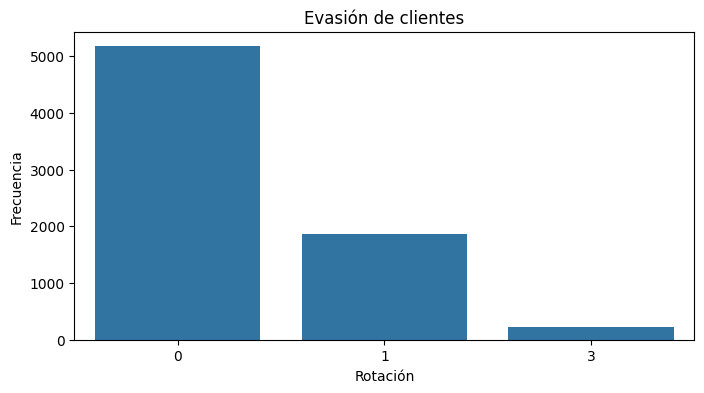

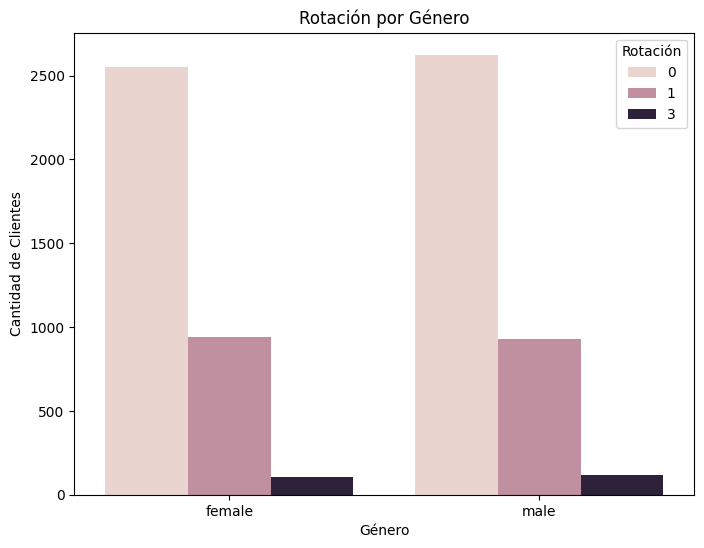

In [185]:
# prompt: graficar columna rotacion y genero

# Histograma para 'rotacion'
plt.figure(figsize=(8, 4))
sns.countplot(x='rotacion', data=datos)
plt.title('Evasión de clientes')
plt.xlabel('Rotación')
plt.ylabel('Frecuencia')
plt.show()


# Gráfico de barras apiladas de rotación por género
plt.figure(figsize=(8, 6))
sns.countplot(data=datos, x='genero', hue='rotacion')
plt.title('Rotación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Rotación')
plt.show()

#📄Informe final